In [84]:
%load_ext autoreload
%autoreload
import importlib
from SOAEpeaks import load_df
import phaseco as pc
from phaseco import *
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(pc)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'phaseco' from 'c:\\Users\\Owner\\OneDrive\\Documents\\GitHub\\phase-coherence\\phaseco\\__init__.py'>

In [4]:
df = load_df(laptop=True, dfs_to_load=["Curated Data"])
wf = df[df['species'] == 'Anolis'].iloc[0]['wf']
del df

Loading Curated Data
Combining into one Dataframe!


In [90]:
# Downsample in time
ds_factor = 4
wf_ds = wf[::ds_factor]
fs = int(44100/ds_factor)

# Crop waveform
crop_factor = 10
wf_cropped = wf_ds[0:int(len(wf_ds)/crop_factor)]

xi = 0.0025
tau = 0.05
f_cwt = np.fft.rfftfreq(int(tau*fs), d=1/fs)[1:] # First bin has been dropped

In [ ]:
f, psd = pc.get_welch(wf=wf_cropped, fs=fs, tau=tau, xi=xi)
# wav_coherence_smallbw = pc.get_wavelet_coherence(wf=wf_cropped, fs=fs, f=f_cwt, fb=1, xi=xi)
wav_coherence_medbw = pc.get_wavelet_coherence(wf=wf_cropped, fs=fs, f=f_cwt, fb=10, xi=xi)
wav_coherence_bigbw = pc.get_wavelet_coherence(wf=wf_cropped, fs=fs, f=f_cwt, fb=100, xi=xi)


0.034702131881845975
0.0017604483492696214
0.0022639369560409576


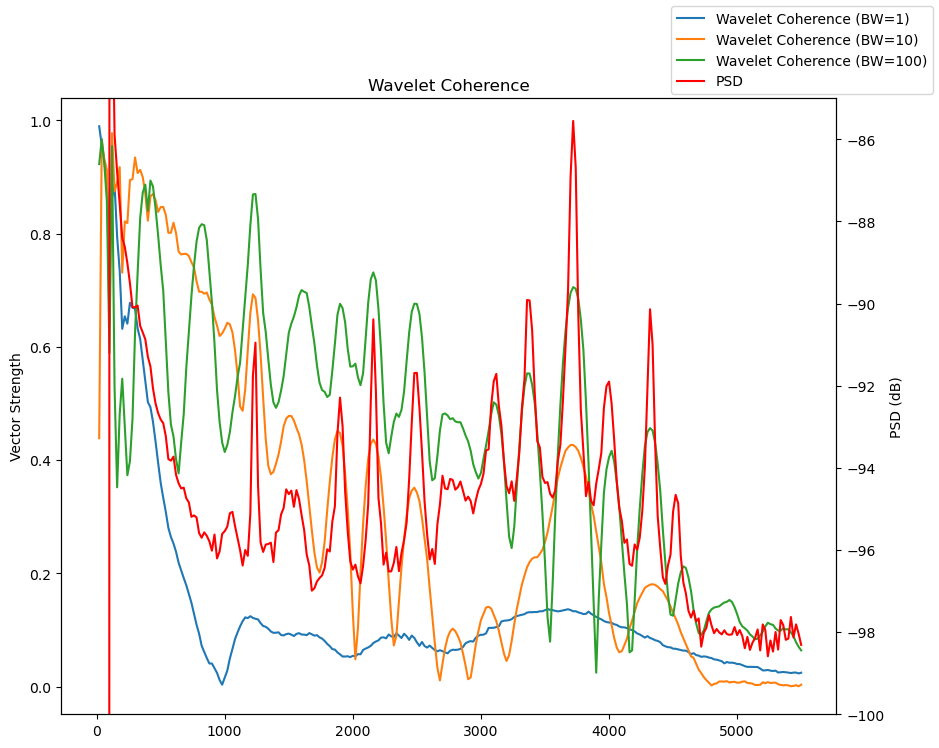

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Wavelet Coherence")
# plt.plot(f_cwt, wav_coherence_smallbw, label=r'Wavelet Coherence (BW=1)')
plt.plot(f_cwt, wav_coherence_medbw, label=r'Wavelet Coherence (BW=10)')
plt.plot(f_cwt, wav_coherence_bigbw, label=r'Wavelet Coherence (BW=100)')
plt.ylabel("Vector Strength")
ax2 = plt.twinx()
ax2.plot(f, 10*np.log10(psd), color='red', label='PSD')
ax2.set_ylabel("PSD (dB)")
ax2.set_ylim(-100, -85)
plt.gcf().legend()
plt.show()

In [ ]:
f, C_xi_gauss_smallSTD = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, ref_type="next_seg", win_type=("gauss", 1))
f, C_xi_gauss_medSTD = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, ref_type="next_seg", win_type=("gauss", 10))
f, C_xi_gauss_bigSTD = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, ref_type="next_seg", win_type=("gauss", 100))
f, C_xi_gauss_hugeSTD = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, ref_type="next_seg", win_type=("gauss", 1000))
f, C_xi = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, ref_type="next_seg")

In [ ]:


plt.figure(figsize=(10, 6))
plt.title("Coherence Measures")
plt.plot(f, C_xi, label=r'$C_{\xi}$')
plt.plot(f, C_xi_gauss_smallSTD, label=r'$C_{\xi}^{gauss} \sigma=1$')
plt.plot(f, C_xi_gauss_medSTD, label=r'$C_{\xi}^{gauss} \sigma=10$')
plt.plot(f, C_xi_gauss_bigSTD, label=r'$C_{\xi}^{gauss} \sigma=100$')
plt.plot(f, C_xi_gauss_hugeSTD, label=r'$C_{\xi}^{gauss} \sigma=1000$')

plt.ylabel("Vector Strength")
plt.legend(loc="center right")
# ax2 = plt.twinx()
# ax2.plot(f, 10*np.log10(psd), color='red', label='PSD')
# ax2.set_ylabel("PSD (dB)")
# ax2.set_ylim(-100, -85)
plt.legend()
plt.show()

In [ ]:
"Wavelet-gram"
# Plot the wavelet coefficients
plt.figure(figsize=(10, 6))
t_ax_ds = 10
c = np.abs(cwt)[::t_ax_ds, ::]
plt.imshow(np.abs(c), extent=[f_cwt[0], f_cwt[-1], 0, len(wf_cropped)/fs], 
           cmap='viridis', aspect='auto', vmin=0, vmax=abs(c).max())
plt.colorbar(label='Magnitude')
plt.ylabel('Time [s]')
plt.xlabel('Frequency')
plt.title('Anolis CWT Magnitudes')
plt.show()

In [ ]:
"Spectrogram"
tau = 0.05
xi = 0.0025
f_stft, stft = get_stft(wf=wf_cropped, fs=fs, tau=tau, xi=xi)
f_min = f_cwt[0]
f_max = f_cwt[-1]
f_min_idx = (np.abs(f_stft - f_min)).argmin()  # find index of closest value to f - f_min
f_max_idx = (np.abs(f_stft - f_max)).argmin()  # find index of closest value to f - f_max
f_stft = f_stft[f_min_idx:f_max_idx]
stft = stft[:, f_min_idx:f_max_idx]

c_spec = np.abs(stft)
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(c_spec), extent=[f_stft[0], f_stft[-1], 0, len(wf_cropped)/fs - tau], 
           cmap='viridis', aspect='auto', vmin=0, vmax=abs(c_spec).max())
plt.colorbar(label='Magnitude')
plt.ylabel('Time [s]')
plt.xlabel('Frequency')
plt.title('Anolis STFT Magnitudes')
plt.show()
